# Кластеризация. K-means.

Наиболее простой, но в то же время достаточно неточный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. 

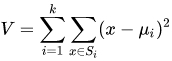

где k — число кластеров, S - полученные кластеры i =1,2,..,k , μ — центры масс всех векторов x из кластера.

Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.

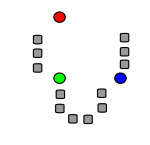

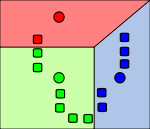

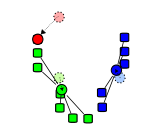

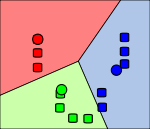

# Проблемы k-means

* Не гарантируется достижение глобального минимума суммарного квадратичного отклонения V, а только одного из локальных минимумов.

* Результат зависит от выбора исходных центров кластеров, их оптимальный выбор неизвестен.Классический вариант подразумевает случайный выбор класторов, что очень часто являлось источником погрешности. Как вариант решения, необходимо проводить исследования объекта для более точного определения центров начальных кластеров.

* необходимо заранее знать количество кластеров.

* не справляется с задачей, когда объект принадлежит к разным кластерам в равной степени или не принадлежит ни одному.

# Sklearn.KMeans

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
df = pd.DataFrame(Data,columns=['x','y'])
print (df.head())

    x   y
0  25  79
1  34  51
2  22  53
3  27  78
4  33  59


In [8]:
kmeans = KMeans(n_clusters=3).fit(df)

In [9]:
centroids = kmeans.cluster_centers_

In [10]:
centroids

array([[29.6, 66.8],
       [43.2, 16.7],
       [55.1, 46.1]])

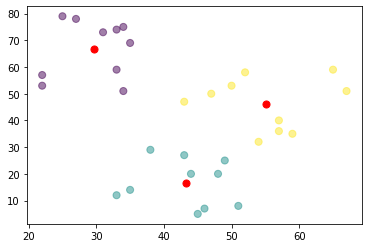

In [11]:
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[30.83333333 74.66666667]
 [43.2        16.7       ]
 [55.1        46.1       ]
 [27.75       55.        ]]


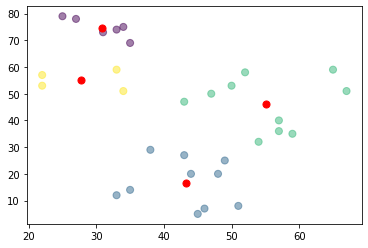

In [15]:
kmeans = KMeans (n_clusters = 4) .fit (df) 
centroids = kmeans.cluster_centers_ 
print (centroids) 

plt.scatter (df ['x' ], df ['y'], c = kmeans.labels_.astype (float), s = 50, alpha = 0.5) 
plt.scatter (centroids [:, 0], centroids [:, 1], c = 'red', s = 50) 
plt.show ()

In [16]:
kmeans.labels_

array([0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
kmeans.predict([[40, 0], [32, 3]])

array([1, 1])

# Определение доминирующих цветов изображения

In [39]:
from collections import namedtuple
from math import sqrt
import random
from IPython.display import HTML, display
try:
    import Image
except ImportError:
    from PIL import Image

Point = namedtuple('Point', ('coords', 'n', 'ct'))
Cluster = namedtuple('Cluster', ('points', 'center', 'n'))

def get_points(img):
    points = []
    w, h = img.size
    for count, color in img.getcolors(w * h):
        points.append(Point(color, 3, count))
    return points

rtoh = lambda rgb: '#%s' % ''.join(('%02x' % p for p in rgb))

def colorz(filename, n):
    img = Image.open(filename)
    img.thumbnail((200, 200))
    w, h = img.size

    points = get_points(img)
    clusters = kmeans(points, n, 1)
    rgbs = [map(int, c.center.coords) for c in clusters]
    return list(map(rtoh, rgbs))

def euclidean(p1, p2):
    return sqrt(sum([
        (p1.coords[i] - p2.coords[i]) ** 2 for i in range(p1.n)
    ]))

def calculate_center(points, n):
    vals = [0.0 for i in range(n)]
    plen = 0
    for p in points:
        plen += p.ct
        for i in range(n):
            vals[i] += (p.coords[i] * p.ct)
    return Point([(v / plen) for v in vals], n, 1)

def kmeans(points, k, min_diff):
    clusters = [Cluster([p], p, p.n) for p in random.sample(points, k)]

    while 1:
        plists = [[] for i in range(k)]

        for p in points:
            smallest_distance = float('Inf')
            for i in range(k):
                distance = euclidean(p, clusters[i].center)
                if distance < smallest_distance:
                    smallest_distance = distance
                    idx = i
            plists[idx].append(p)

        diff = 0
        for i in range(k):
            old = clusters[i]
            center = calculate_center(plists[i], old.n)
            new = Cluster(plists[i], center, old.n)
            clusters[i] = new
            diff = max(diff, euclidean(old.center, new.center))

        if diff < min_diff:
            break

    return clusters

In [31]:
colors = colorz("ex1.jpg", n = 5)

In [32]:
", ".join(colors)

'#a68d8c, #955845, #d1c2c5, #51362a, #22150d'

![title](ex1.jpg) 

<table><tr><td><img src='ex1_1.jpg'></td><td><img src='ex1_2.jpg'></td><td><img src='ex1_3.jpg'></td><td><img src='ex1_4.jpg'></td><td><img src='ex1_5.jpg'></td></tr></table>

In [40]:
colors = colorz("ex2.jpg", n = 3)

In [41]:
", ".join(colors)

'#758195, #0f2234, #b7c9db'

![title](ex2.jpg)

<table><tr><td><img src='ex2_1.jpg'></td><td><img src='ex2_2.jpg'></td><td><img src='ex2_3.jpg'></td></tr></table>